In [1]:
import noise
import numpy as np
import matplotlib.pyplot as plt
import random
import math as m
import pandas as pd

0.299935653061


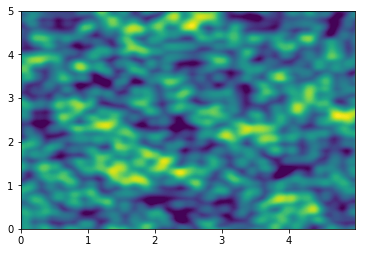

In [31]:
size = 5
points = 500
step = size/points
def genMap(size, base = 0, o = 1,p = 0.5, l =2):
    x = []
    y = []
    z = []
    mapper = []
    for i in np.arange(0.0, size, step):
        row = []
        for j in np.arange(0.0, size, step):
            h = base+noise.pnoise2(j,i, octaves = o, persistence = p, lacunarity =l)
            row.append(h)
            x.append(j)
            y.append(i)
            #h.append(noise.snoise2(j,i,octaves = o, persistence = p, lacunarity=l))
            z.append(h)
        mapper.append(row)
    
    z = [x if x>0 else 0 for x in z]
    print(np.mean(h))

    plt.tricontourf(x,y,z,100)
    plt.show()
    plt.close()
    
    #return(list(zip(x,y,h)))
    return(np.array(mapper))
    
area = genMap(size,base = 0.3, o=3, p = 1, l = 2)

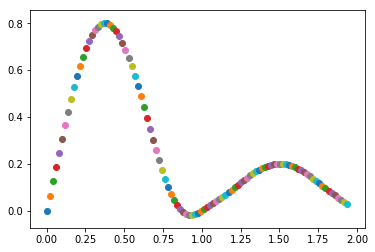

In [230]:
#1D demo
points = 256
span = 5.0
speed = 1.0

base = 0
min = max = 0

r = range(100)

for i in r:
    x = float(i)*span/points
    y = noise.pnoise1(x + base, octaves =1,persistence = 0.75, lacunarity = 10)
    plt.scatter(x,y)

   lrLat  lrLon  ulLat  ulLon  lat   lon         z    zsigma
0     10     10      0      0  5.0   5.0  0.372619  0.036529
1     10     20      0     10  5.0  15.0  0.353563  0.032248
2     10     30      0     20  5.0  25.0  0.328743  0.027172
3     10     40      0     30  5.0  35.0  0.392239  0.037113
4     10     50      0     40  5.0  45.0  0.297687  0.069320
2401


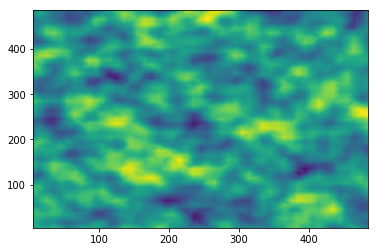

In [43]:
#	lrLat	lrLon	ulLat	ulLon	lat	lon	z	zsigma
def deriveStats(topArr, incr = 10):
    #each 1 is a degree
    #currently only works with square maps
    side = len(topArr)
        
    stats = []
    for i in range(0,side-incr,incr):
        for j in range(0,side-incr,incr):
            ulLat = i
            ulLon = j
            lrLat = i+incr
            lrLon = j+incr
            lat = np.mean((ulLat,lrLat))
            lon = np.mean((ulLon,lrLon))
            
            subarea = topArr[ulLat:lrLat,ulLon:lrLon]
            
            z = np.mean(subarea)
        
            zsigma = np.std(subarea)
            stats.append([lrLat,lrLon,ulLat,ulLon,lat,lon,z,zsigma])
            
    return(stats)
            

    
stat = deriveStats(area, incr = 10)


topoDF = pd.DataFrame(stat, columns = ['lrLat','lrLon','ulLat','ulLon',
                              'lat','lon','z','zsigma'])     

print(topoDF.head())
topoDF.to_csv('Test Terrain.csv')
print(len(topoDF))
plt.tricontourf(topoDF['lon'],topoDF['lat'],topoDF['z'],100)
plt.show()
    